# Radial Basis Function Networks (RBFN)

## XOR example (slide 9)

In [1]:
import numpy as np
from numpy import exp
from numpy import bitwise_xor as xor

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as col

In [3]:
# conda install ipywidgets
import ipywidgets as widgets

In [4]:
# Define function result
#
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # [A, B]
result = np.array([xor(a, b) for a, b in X])  # xor(A,B)

print(result)

[0 1 1 0]


In [5]:
# Select 2 centers
#
mu1 = [0, 1]
mu2 = [1, 0]

In [6]:
y = []
for k in range(len(X)):
    y.append([exp(-np.linalg.norm(X[k,:] - mu1)),
              exp(-np.linalg.norm(X[k,:] - mu2))])
    print(f"X={X[k]}, y={y[k]}")

X=[0 0], y=[0.36787944117144233, 0.36787944117144233]
X=[0 1], y=[1.0, 0.2431167344342142]
X=[1 0], y=[0.2431167344342142, 1.0]
X=[1 1], y=[0.36787944117144233, 0.36787944117144233]


In [7]:
# this function will do the hard job
#
def plot_map(beta1: float, beta2: float, bias: float):
    # plot the classification map
    #
    

    # our new colormap
    paleta = col.LinearSegmentedColormap.from_list(
        'our_colors', ['#b01010', '#208020'])
    
    # extents
    from_to = (-0.1, 1.1)
    
    # points
    nn = 50
    
    xx = np.linspace(*from_to, nn)
    yy = np.linspace(*from_to, nn)
    XX, YY = np.meshgrid(xx, yy)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    
    zz = []
    for k in range(nn * nn):
        x = xy[k,:]
        y = [exp(-beta1 * np.linalg.norm(x - mu1)**2), 
             exp(-beta2 * np.linalg.norm(x - mu2)**2)]
        phi = np.sum(y) + bias
        
        # save 3d surface height
        zz.append(phi)

    zz = np.array(zz).reshape(XX.shape)
    
    # 2-class problem reduction
    ZZ = np.where(zz >= 0, 1, 0)
    
    fig = plt.figure()

    plt.imshow(ZZ, origin='lower', 
               extent=(*from_to, *from_to), cmap='RdYlGn')
    plt.colorbar()

    plt.scatter(x=X[:,0], y=X[:,1], c=result, cmap='binary_r')
    plt.colorbar()
    plt.title("Classification map")

    plt.show()
    
    # Plot 3D surface
    #
    fig = plt.figure(figsize=(8,8))
    
    # 3-D projection
    ax = plt.axes(projection ='3d')

    # plotting
    ax.plot_surface(XX, YY, zz, 
                    rstride = 1, cstride = 1, 
                    vmin = -0.1, vmax = 0.1,
                    cmap = paleta, 
                    edgecolor = 'none')

    # rotate view to see better
    ax.view_init(30, -120)

    plt.xlabel('x1')
    plt.ylabel('x2')
    ax.set_title('$\Phi(x)$ surface')

    plt.show()

In [8]:
# Widgets creation for interactive map
#
beta1 = widgets.FloatSlider(value=0.8, min=0, max=2, step=0.1, continuous_update=False, description="$B_1$:")
beta2 = widgets.FloatSlider(value=1.7, min=0, max=2, step=0.1, continuous_update=False, description="$B_2$:")
bias = widgets.FloatSlider(value=-1.0, min=-2, max=0, step=0.1, continuous_update=False, description="$b$:")

# Vertical layout
ui = widgets.VBox([beta1, beta2, bias])

out = widgets.interactive_output(plot_map, 
                                 {'beta1': beta1, 
                                  'beta2': beta2, 
                                  'bias': bias})

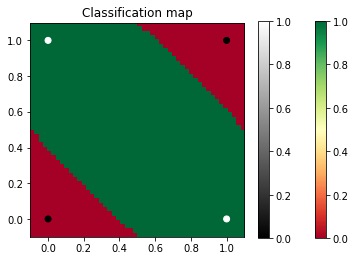

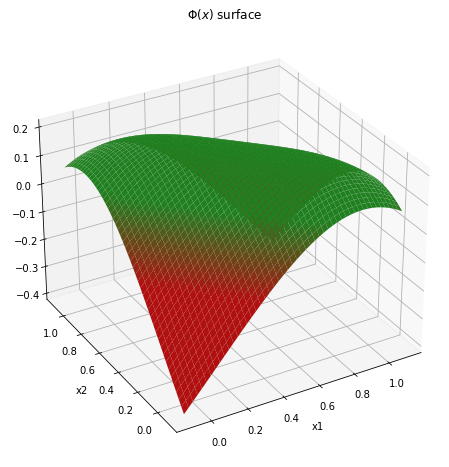

In [9]:
# Static map plot
#
plot_map(beta1=1., beta2=1., bias=-1.)

In [10]:
# Interactive map play
#
display(out, ui)

Output()

$\Phi(x)=e^{-\beta_1{||{x-\mu_1}||}^2} + e^{-\beta_2{||{x-\mu_2}||}^2}+b$

End